Kaggle install

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download restaurant-revenue-prediction

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!pip install --upgrade plotly
!pip install -U scikit-learn
!pip uninstall matplotlib -Y
!pip install matplotlib


Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: -Y


In [ ]:
!pip install sklearn-evaluation

In [ ]:
%matplotlib notebook
%matplotlib inline

Data and libraries import

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import plotly.express as px
import plotly.graph_objects as go

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import model_selection
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn_evaluation import plot
from sklearn_evaluation.plot import grid_search


# from scipy import stats
# from scipy.stats import norm
# from sklearn.feature_selection import RFECV
# from sklearn.feature_selection import RFE
# from IPython.display import Image
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import neural_network
# from sklearn import preprocessing
# from tqdm.auto import tqdm
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# for google colabl
import os
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
  
#for kaggle
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Read data

data_path = './content/train.csv.zip'
test_path = './content/test.csv.zip'

restaurant_df = pd.read_csv(data_path)
test_df = pd.read_csv(test_path)

display(restaurant_df)

display(test_df)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0


In [ ]:
print("Check if there are columns with empty values")
display(restaurant_df.isna().any())

print(f'There are {len(np.where(restaurant_df.isnull())[0])} empty values in the dataframe')

# count empty values in each column
def count_empty_values_in_each_column(df: pd.DataFrame):
  print('empty values')
  print('------------\n')
  
  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

count_empty_values_in_each_column(restaurant_df)

Check if there are columns with empty values


Id            False
Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool

There are 0 empty values in the dataframe
empty values
------------

Id: 0
Open Date: 0
City: 0
City Group: 0
Type: 0
P1: 0
P2: 0
P3: 0
P4: 0
P5: 0
P6: 0
P7: 0
P8: 0
P9: 0
P10: 0
P11: 0
P12: 0
P13: 0
P14: 0
P15: 0
P16: 0
P17: 0
P18: 0
P19: 0
P20: 0
P21: 0
P22: 0
P23: 0
P24: 0
P25: 0
P26: 0
P27: 0
P28: 0
P29: 0
P30: 0
P31: 0
P32: 0
P33: 0
P34: 0
P35: 0
P36: 0
P37: 0
revenue: 0


Which city is the best  
When is the best time to open a resturant  
Which type of resturant is the best  


parse open date  
Type  
City

Data Exploration

City VS Revenue

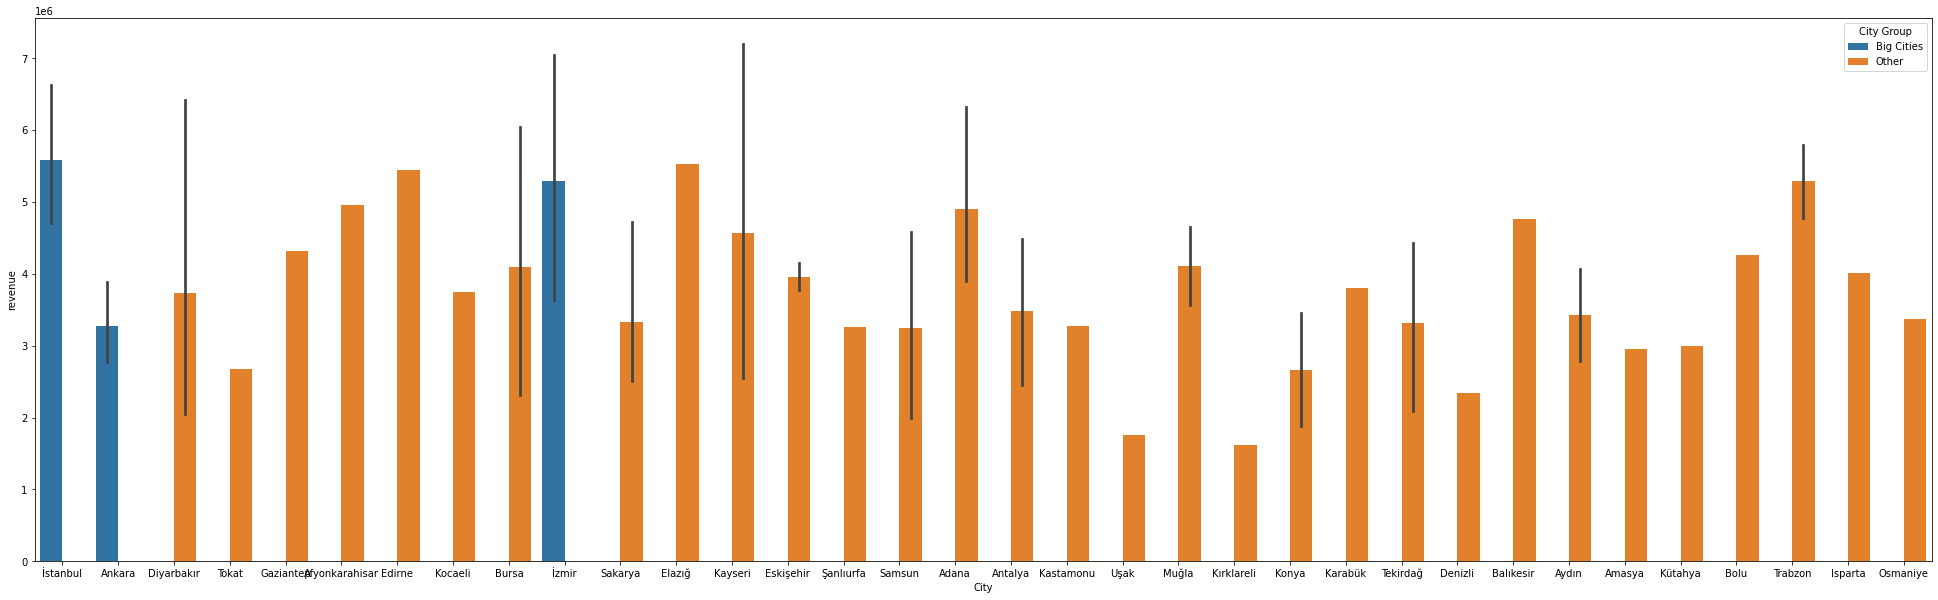

In [ ]:
plt.figure(figsize=(34,10))
sns.barplot(data=restaurant_df, x="City", y="revenue", hue="City Group")

City Group VS Revnue

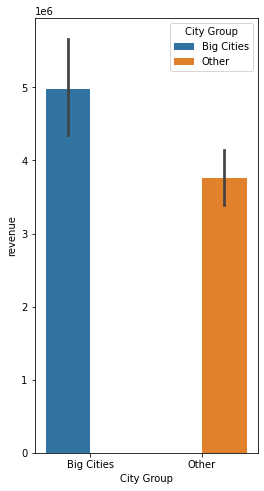

In [ ]:
plt.figure(figsize=(4,8))
sns.barplot(data=restaurant_df, x="City Group", y="revenue", hue="City Group")

Type VS Revenue

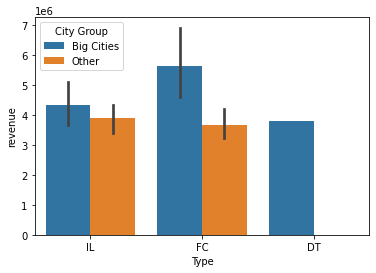

In [ ]:
sns.barplot(data=restaurant_df, x="Type", y="revenue", hue="City Group")

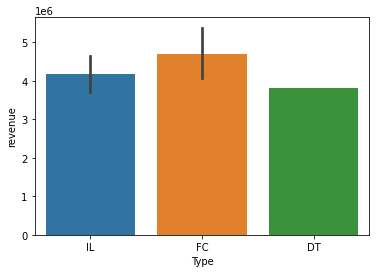

In [ ]:
sns.barplot(data=restaurant_df, x="Type", y="revenue")

Heatmap

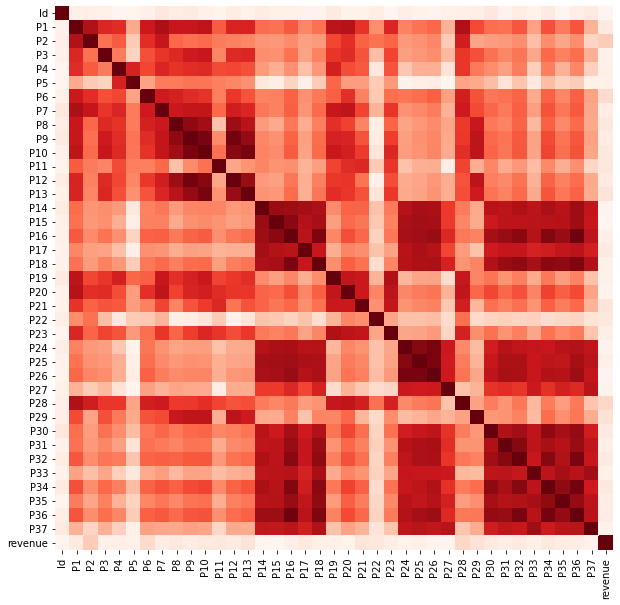

In [ ]:
plt.figure(figsize=(10,10))
cor = np.abs(restaurant_df.corr())
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds, vmin=0, vmax=1 ,cbar = False)
plt.show()

Feature Engeenring

In [ ]:
numerical_cols = restaurant_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [ ]:
cor['revenue']
group1 = cor['revenue'][['P30','P31','P32','P33','P34','P35','P36','P37']]
print(group1)
print(max(group1))

P30    0.066203
P31    0.040418
P32    0.065857
P33    0.032426
P34    0.072343
P35    0.050156
P36    0.050534
P37    0.019051
Name: revenue, dtype: float64
0.07234280699800924


In [ ]:
group3 = cor['revenue'][['P14','P15','P16','P17','P18']]
print(group3)
print(max(group3))

P14    0.006441
P15    0.000742
P16    0.037997
P17    0.067137
P18    0.034537
Name: revenue, dtype: float64
0.06713690274053422


In [ ]:
group2 = cor['revenue'][['P24','P25','P26','P27']]
print(group2)
print(max(group2))

P24    0.014222
P25    0.036365
P26    0.007650
P27    0.013680
Name: revenue, dtype: float64
0.036364646386285934


In [ ]:
group4 = cor['revenue'][['P6','P7','P8','P9','P10']]
print(group4)
print(max(group4))

P6     0.139094
P7     0.051165
P8     0.084215
P9     0.050352
P10    0.073220
Name: revenue, dtype: float64
0.1390942389089374


In [ ]:
restaurant_df_cp = restaurant_df.copy()

In [ ]:
# restaurant_df_cp = restaurant_df_cp.drop(['Id'], axis=1)
restaurant_df_cp = restaurant_df_cp.drop(['Id','P7','P8','P9','P10', 'P12', 'P14','P15','P16','P18', 'P24','P26','P27','P30','P31','P32','P33','P35','P36','P37'], axis=1)

Date

In [ ]:
from datetime import datetime

dates = restaurant_df_cp['Open Date'].values
month = []
year = []
day = []
weekend = []

for date in dates:
  m,d,y = date.split('/')
  m = int(m)
  y = int(y)
  d = int(d)
  month.append(m)
  year.append(y)
  day.append(d)
  weekend.append(1 if datetime(y,m,d).weekday() > 4 else 0)

restaurant_df_cp['Year'] = year
restaurant_df_cp['Month'] = month
restaurant_df_cp['Day'] = day
restaurant_df_cp['Weekend'] = weekend
# restaurant_df_cp[['Open Date', 'Year', 'Month', 'Day', 'Weekend']]

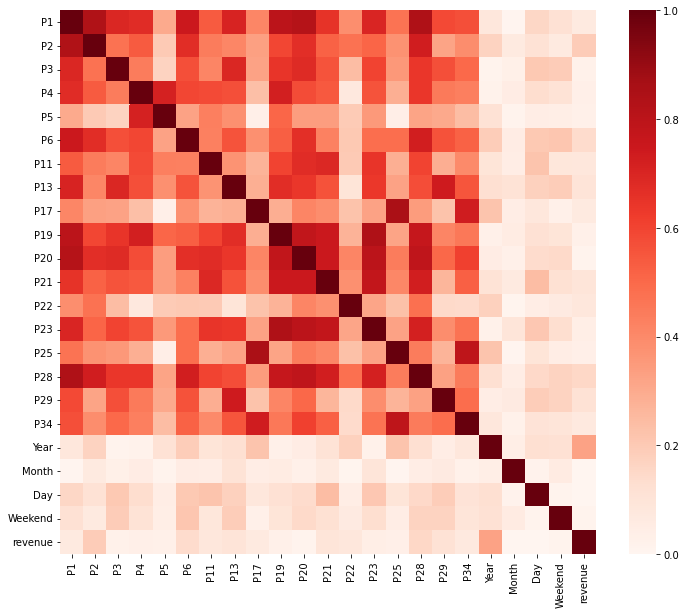

In [ ]:
plt.figure(figsize=(12,10))
df_hm = restaurant_df_cp.drop(labels='revenue', axis=1)
df_hm['revenue'] = restaurant_df_cp['revenue']
cor = np.abs(df_hm.corr())
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds, vmin=0, vmax=1 ,cbar = True)
plt.show()

In [ ]:
restaurant_df_cp=restaurant_df_cp.drop(['Open Date'], axis=1)

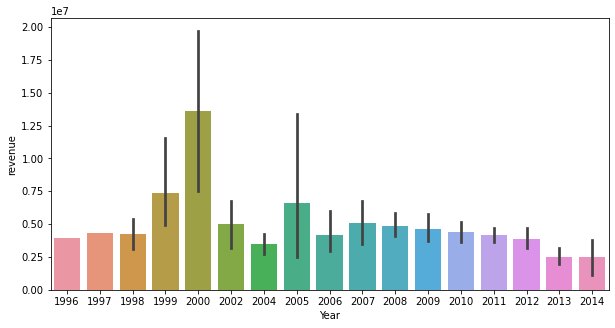

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=restaurant_df_cp, x="Year", y="revenue")

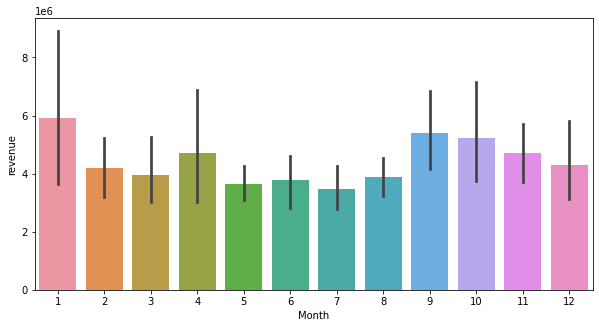

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=restaurant_df_cp, x="Month", y="revenue")

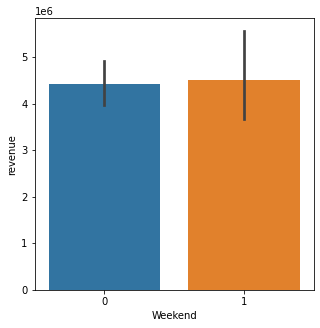

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=restaurant_df_cp, x="Weekend", y="revenue")

CROSS VALIDATION

In [ ]:
# divide the data to features and target
t = restaurant_df_cp['revenue'].copy()
X = restaurant_df_cp.drop(['revenue'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64


X


,City,City Group,Type,P1,P2,P3,P4,P5,P6,P11,P13,P17,P19,P20,P21,P22,P23,P25,P28,P29,P34,Year,Month,Day,Weekend
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,3,5.0,2,5,4,1,3,3,1,2.0,3.0,5,1999,7,17,1
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,1,5.0,0,3,2,1,3,2,0,3.0,3.0,0,2008,2,14,0
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,2,5.0,0,1,1,1,1,1,0,1.0,3.0,0,2013,3,9,1
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,8,7.5,3,20,12,6,1,10,2,2.5,7.5,18,2012,2,2,0
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,2,5.0,1,2,2,1,2,1,3,1.0,3.0,3,2009,5,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4.0,0,4,3,2,1,1,0,2.0,3.0,0,2008,6,25,0
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,5.0,0,3,2,2,1,1,0,3.0,3.0,0,2006,10,12,0
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,1,5.0,0,2,3,1,2,2,0,2.0,3.0,0,2006,7,8,1
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,2,5.0,0,1,1,1,1,1,0,3.0,3.0,0,2010,10,29,0


In [ ]:
# def find_generator_len(generator, use_pbar=True):
#     i = 0
    
#     if use_pbar:
#         pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

#     for a in generator:
#         i += 1

#         if use_pbar:
#             pbar.update()

#     if use_pbar:
#         pbar.close()

#     return i

In [ ]:

    # if use_pbar:
    #     pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))
    #     if use_pbar:
    #         pbar.update()

    # if use_pbar:
    #     pbar.close()

# calculate score and loss from cv (KFold) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
        
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared=False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared=False)]


    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

###SGDRegressor

In [ ]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])

model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: -0.56
mean cv val loss 2605878.22
mean cv val score: 0.34
mean cv val loss 2088581.01


In [ ]:
SDG_reg_original = pipeline.make_pipeline(ct, SGDRegressor(random_state=1)).fit(X, t)

y_train_sdg = SDG_reg_original.predict(X)
print('Accuracy score on train', SDG_reg_original.score(X, t))
print('RMSE score on train',(mean_squared_error(t, y_train_sdg, squared=False)))

Accuracy score on train 0.31139232096021396
RMSE score on train 2129869.676142312


In [ ]:
feature_arr = ct.fit_transform(X, t)
feature_labels = ct.get_feature_names_out(all_cols.tolist())
X_encoded = pd.DataFrame(feature_arr, columns=feature_labels)

hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1,1]}

gs_model = GridSearchCV(SGDRegressor(random_state=1), hyper_parameters).fit(X_encoded, t)
print('Accuracy score for regression:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for regression:
gs_model 0.009642228268009246
best params {'alpha': 1, 'penalty': 'l2'}


In [ ]:
model_pipe = make_pipeline(ct, SGDRegressor(random_state=1, alpha = 1, penalty='l2'))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: -0.04
mean cv val loss 2245343.15
mean cv val score: 0.20
mean cv val loss 2296667.47


In [ ]:
sdg_hyper_model =pipeline.make_pipeline(ct, SGDRegressor(random_state=1, alpha=1, penalty='l2')).fit(X, t)
y_train_sdg_hyper = gs_model.predict(X_encoded)

print('Accuracy score on train', sdg_hyper_model.score(X, t))
print('RMSE score on train',(mean_squared_error(t, y_train_sdg_hyper, squared=False)))


Accuracy score on train 0.18460765025037884
RMSE score on train 2317663.684533361


###XGBoost

In [ ]:
from xgboost import XGBRegressor


In [ ]:
XGB_model = pipeline.make_pipeline(ct, XGBRegressor(objective='reg:squarederror'))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, XGB_model, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: -0.35
mean cv val loss 2522287.70
mean cv val score: 0.92
mean cv val loss 709300.20


In [ ]:
XGB_reg_original = pipeline.make_pipeline(ct, XGBRegressor(objective='reg:squarederror')).fit(X, t)

y_train = XGB_reg_original.predict(X)

In [ ]:
print('Accuracy score on train', XGB_reg_original.score(X, t))
print('RMSE score on train',(mean_squared_error(t, y_train, squared=False)))

Accuracy score on train 0.9062471838304207
RMSE score on train 785885.4724305375


In [ ]:
# train with random search and get best parameters

# feature_arr = ct.fit_transform(X, t)
# feature_labels = ct.get_feature_names_out(all_cols.tolist())
# X_encoded = pd.DataFrame(feature_arr, columns=feature_labels)

param_dist = {'n_estimators': list(range(10,100,10)),
              'max_depth': range(3,10),
             }

rs_model = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_dist, cv=5).fit(X_encoded, t)
print('Accuracy score for regression:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

Accuracy score for regression:
rs_model -0.19011091740377947
best params {'max_depth': 4, 'n_estimators': 20}


Text(0, 0.5, 'Log Loss')

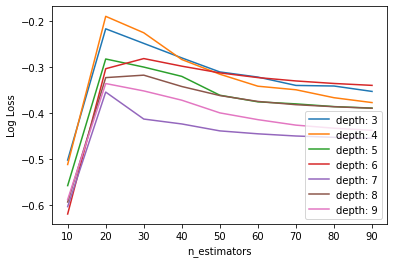

In [ ]:
means = rs_model.cv_results_['mean_test_score']
stds = rs_model.cv_results_['std_test_score']
params = rs_model.cv_results_['params']
n_estimators =list(range(10,100,10))
max_depth = range(3,10)

scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

In [ ]:
XGB_reg_hyper = pipeline.make_pipeline(ct, XGBRegressor(objective='reg:squarederror',max_depth =4, n_estimators=20, learning_rate=0.1)).fit(X, t)

y_train_hyper = XGB_reg_hyper.predict(X)

In [ ]:
print('Accuracy score on train', XGB_reg_hyper.score(X, t))
print('RMSE score on train',(mean_squared_error(t, y_train_hyper, squared=False)))

Accuracy score on train 0.7063737587831955
RMSE score on train 1390799.5210448876


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# random_forst_model = RandomForestRegressor(criterion='squared_error', random_state = 1, bootstrap=True, max_depth=10, n_estimators=80)

random_forst_model = RandomForestRegressor(bootstrap= True, max_depth=10, min_samples_leaf= 4, min_samples_split= 2, n_estimators=10)
random_forst_model.fit(X_encoded, t)
forest_test_predict = random_forst_model.predict(X_encoded)

In [ ]:
print('Accuracy score on train', random_forst_model.score(X_encoded, t))
print('RMSE score on train',(mean_squared_error(t, forest_test_predict, squared=False)))

Accuracy score on train 0.5473098868735254
RMSE score on train 1726901.6496761043


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

AdaBoost_model = pipeline.make_pipeline(ct, AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=1, loss='square'))

val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, AdaBoost_model, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: -0.50
mean cv val loss 2699340.05
mean cv val score: 0.83
mean cv val loss 1038127.53


In [ ]:
AdaBoost_model_predict = AdaBoost_model.predict(X)
print('Accuracy score on train', AdaBoost_model.score(X, t))
print('RMSE score on train',(mean_squared_error(t, AdaBoost_model_predict, squared=False)))

Accuracy score on train 0.8059081692202944
RMSE score on train 1130760.7569985196


In [ ]:
y_rs = rs_model.predict(X_encoded)
print('Accuracy score on train', rs_model.score(X_encoded, t))
print('RMSE score on train',(mean_squared_error(t, y_rs, squared=False)))

Accuracy score on train 0.7063737587831955
RMSE score on train 1390799.5210448876


In [ ]:
rs_model_pipe  = pipeline.make_pipeline(ct, XGBRegressor(objective='reg:squarederror', max_depth=4, n_estimators=20)).fit(X, t)
print('Accuracy score for regression:')
y_rs_pipe = rs_model_pipe.predict(X)
print('Accuracy score on train', rs_model_pipe.score(X, t))
print('RMSE score on train',(mean_squared_error(t, y_rs_pipe, squared=False)))
# print('rs_model', rs_model_pipe.best_score_)
# print('best params', rs_model_pipe.best_params_)

Accuracy score for regression:
Accuracy score on train 0.7063737587831955
RMSE score on train 1390799.5210448876


In [ ]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, rs_model_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: -0.22
mean cv val loss 2384685.94
mean cv val score: 0.72
mean cv val loss 1349090.93


In [ ]:
rs_model_pipe_Ada  = pipeline.make_pipeline(ct, AdaBoostRegressor()).fit(X, t)

val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, rs_model_pipe_Ada, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: -0.69
mean cv val loss 2704035.64
mean cv val score: 0.74
mean cv val loss 1291363.12


In [ ]:
param_dist = {'n_estimators': [300,350,400,450,500,550,600, 650, 700],
              'learning_rate': [0.00001, 0.0001, 0.001 ,0.01,0.1, 1]
             }
ab_model = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), random_state=1, loss='square'), param_dist, cv=10).fit(X_encoded, t)
print('Accuracy score for regression:')
print('ab_model', ab_model.best_score_)
print('best params', ab_model.best_params_)

Accuracy score for regression:
ab_model -0.05400895673661517
best params {'learning_rate': 1e-05, 'n_estimators': 600}


In [ ]:
means = ab_model.cv_results_['mean_test_score']
stds = ab_model.cv_results_['std_test_score']
params = ab_model.cv_results_['params']

n_estimators = [300,350,400,450,500,550,600, 650, 700]
learning_rate = [0.00001, 0.0001, 0.001 ,0.01,0.1, 1]

scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Square Loss')

NameError: ignored

In [ ]:
scores.shape

(6, 9)

In [ ]:
rs_model_pipe_Ada  = pipeline.make_pipeline(ct, AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), random_state=1, loss='square',learning_rate= 1e-05, n_estimators=600)).fit(X, t)
print('Accuracy score for regression:')
y_rs_pipe = rs_model_pipe_Ada.predict(X)
print('Accuracy score on train', rs_model_pipe_Ada.score(X, t))
print('RMSE score on train',(mean_squared_error(t, y_rs_pipe, squared=False)))

Accuracy score for regression:
Accuracy score on train 0.7074899962165696
RMSE score on train 1388153.4006967554


### Random forest!

Random forest with default values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_pipe  = pipeline.make_pipeline(ct, RandomForestRegressor(random_state=1)).fit(X, t)

val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, forest_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

mean cv val score: -0.12
mean cv val loss 2300308.81
mean cv train score: 0.86
mean cv train loss 951519.74


Looking for best hyper parameters for random forest

In [ ]:
# This taskes 2+ hours to run, don't rerun please

from sklearn.ensemble import RandomForestRegressor

param_dist_forest_max = {
                'bootstrap': [True, False],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'min_samples_leaf': [1, 2, 4, 5, 6, 7],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
             }

forest_model_max = GridSearchCV(RandomForestRegressor(criterion='squared_error', random_state = 1), param_dist_forest_max, cv = 10).fit(X_encoded, t)
print('Accuracy score for regression:')
print('forest_model', forest_model_max.best_score_)
print('best params', forest_model_max.best_params_)

Accuracy score for regression:
forest_model -0.007362718480677067
best params {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 6}


TypeError: ignored

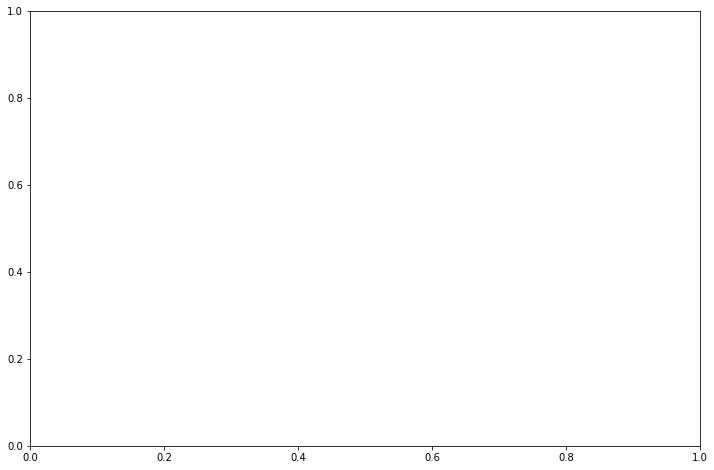

In [ ]:
plt.figure(figsize=(12,8))
grid_search(forest_model_max.cv_results_,  change='n_estimators', subset={'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2})
plt.legend(loc=4)

In [ ]:
forest_model_max.cv_results_

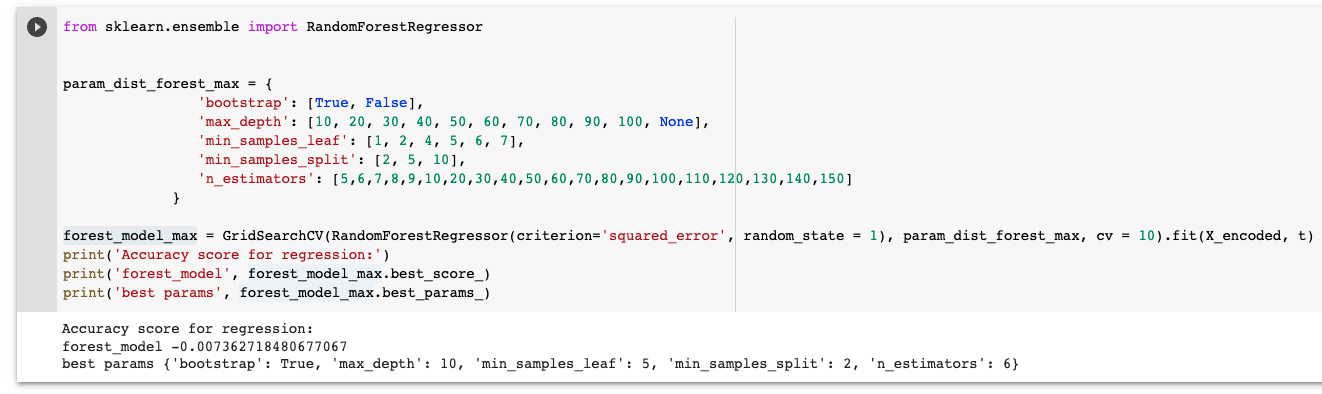

In [ ]:
param_dist_forest = {
                'max_depth': [5, 6, 7, 8, 9, 10, 15, 20, None],
                'min_samples_leaf': range(1, 7, 1),
                'min_samples_split': [2],
                'n_estimators': range(1, 20, 1)
             }

forest_model = GridSearchCV(RandomForestRegressor(criterion='squared_error', random_state = 1), param_dist_forest, cv = 10).fit(X_encoded, t)
print('Accuracy score for regression:')
print('forest_model', forest_model.best_score_)
print('best params', forest_model.best_params_)

Accuracy score for regression:
forest_model -0.0073600157435049106
best params {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 6}


In [ ]:
param_dist_forest = {
                'max_depth': [5, 6, 7, 8, 9, 10, 15, 20, None],
                'min_samples_leaf': range(1, 7, 1),
                'min_samples_split': range(2,14,2),
                'n_estimators': range(1, 10, 1)
             }

forest_model = GridSearchCV(RandomForestRegressor(criterion='squared_error', random_state = 1), param_dist_forest, cv = 10).fit(X_encoded, t)
print('Accuracy score for regression:')
print('forest_model', forest_model.best_score_)
print('best params', forest_model.best_params_)

Accuracy score for regression:
forest_model -0.0073600157435049106
best params {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 6}


ValueError: ignored

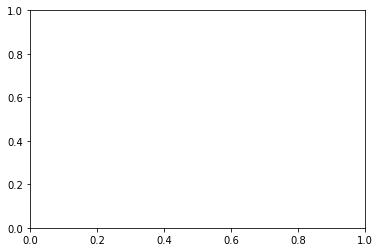

In [ ]:
# forest_means = forest_model.cv_results_['mean_test_score']
# forest_stds = forest_model.cv_results_['std_test_score']
# forest_params = forest_model.cv_results_['params']

# max_depth = [5, 6, 7, 8, 9, 10, 15, 20, None]
# min_samples_leaf = [1,2,3,4,5,6]
# min_samples_split = [2, 4, 6,8,10,12]
# n_estimators = [1,2,3,4,5,6,7,8,9]

# scores_forest = np.array(forest_means).reshape(len(max_depth), len(min_samples_leaf), len(min_samples_split), len(n_estimators))
# for i, value in enumerate(learning_rate):
#     plt.plot(n_estimators, scores_forest[i], label='depth: ' + str(value))
# plt.legend()
# plt.xlabel('n_estimators')
# plt.ylabel('Log Loss')



In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_pipe  = pipeline.make_pipeline(ct, RandomForestRegressor( bootstrap=True,
    max_depth=7,
    min_samples_leaf=5,
    min_samples_split=2,
    n_estimators=6,
    random_state=1
)).fit(X, t)

val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, forest_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

Training with the best hyper parameters from the previous step

In [ ]:
forest_pipe  = pipeline.make_pipeline(ct, RandomForestRegressor(
    bootstrap=True,
    max_depth=7,
    min_samples_leaf=5,
    min_samples_split=2,
    n_estimators=6,
    random_state=1
)).fit(X, t)
print('Accuracy score for regression:')
y_forest_pipe = forest_pipe.predict(X)
print('Accuracy score on train', forest_pipe.score(X, t))
print('RMSE score on train',(mean_squared_error(t, y_forest_pipe, squared=False)))

Forest training for with default values for the forest model

In [ ]:
forst_pipe  = pipeline.make_pipeline(ct, RandomForestRegressor(random_state=1)).fit(X, t)
print('Accuracy score for regression:')
y_forest_pipe = forst_pipe.predict(X)
print('Accuracy score on train', forst_pipe.score(X, t))
print('RMSE score on train',(mean_squared_error(t, y_forest_pipe, squared=False)))

TEST

In [ ]:
count_empty_values_in_each_column(test_df)

In [ ]:
display(test_df['City'].unique())
len(test_df['City'].unique())

In [ ]:
from datetime import datetime

dates = test_df['Open Date'].values
month = []
year = []
day = []
weekend = []

for date in dates:
  m,d,y = date.split('/')
  m = int(m)
  y = int(y)
  d = int(d)
  month.append(m)
  year.append(y)
  day.append(d)
  weekend.append(1 if datetime(y,m,d).weekday() > 4 else 0)

test_df['Year'] = year
test_df['Month'] = month
test_df['Day'] = day
test_df['Weekend'] = weekend
# restaurant_df_cp[['Open Date', 'Year', 'Month', 'Day', 'Weekend']]

In [ ]:
test_df_cp = test_df.copy()

In [ ]:
# test_df_cp = test_df.drop(['Id'], axis=1)
test_df_cp = test_df.drop(['Id','P7','P8','P9','P10', 'P12', 'P14','P15','P16','P18', 'P24','P26','P27','P30','P31','P32','P33','P35','P36','P37'], axis=1)

In [ ]:
test_df_cp=test_df_cp.drop(['Open Date'], axis=1)

In [ ]:
test_df_cp.replace('MB', 'DT', inplace=True)

In [ ]:
test_df_cp

In [ ]:
rs_test_predict = rs_model_pipe.predict(test_df_cp)

In [ ]:
rs_test_predict

In [ ]:
submission_path = '/content/sampleSubmission.csv.zip'

submission_df = pd.read_csv(submission_path)

In [ ]:
submission_df

In [ ]:
submission_df['Prediction'] = rs_test_predict
submission_df.to_csv('sampleSubmission.csv', index = False)
print("Submited")